In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Import the datasets 
df = pd.read_csv("https://raw.githubusercontent.com/DelphineMeera/HeartDisease-Prediction/main/Heart_disease_cleveland_new.csv")

In [3]:
# Drop rows with missing values
df.dropna(inplace=True)

In [4]:
# One-hot encode the categorical features
ohe_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
ct = ColumnTransformer([('ohe', OneHotEncoder(sparse_output=False), ohe_cols)], remainder='drop')
encoded_cols = pd.DataFrame(ct.fit_transform(df))
encoded_cols.columns = ct.get_feature_names_out()

In [5]:
# Combine the encoded categorical columns with the continuous columns
df = pd.concat([encoded_cols,df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']]], axis=1)

In [6]:
# Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the continuous features using StandardScaler
scaler = StandardScaler()
X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])
X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.transform(X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [8]:
# Train and evaluate a Logistic Regression model
lr = LogisticRegression(max_iter=10000)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print('Logistic Regression cross-validation accuracy scores:', lr_scores)
print('Logistic Regression mean accuracy:', np.mean(lr_scores))
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression accuracy:', accuracy_score(y_test, y_pred))
print('Logistic Regression precision:', precision_score(y_test, y_pred))
print('Logistic Regression recall:', recall_score(y_test, y_pred))
print('Logistic Regression f1 score:', f1_score(y_test, y_pred))
print('Logistic Regression ROC AUC score:', roc_auc_score(y_test, y_pred))

Logistic Regression cross-validation accuracy scores: [0.81632653 0.87755102 0.8125     0.85416667 0.875     ]
Logistic Regression mean accuracy: 0.8471088435374149
Logistic Regression accuracy: 0.8360655737704918
Logistic Regression precision: 0.84375
Logistic Regression recall: 0.84375
Logistic Regression f1 score: 0.84375
Logistic Regression ROC AUC score: 0.8356681034482758


In [9]:
# Train and evaluate a Decision Tree model
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print('Decision Tree cross-validation accuracy scores:', dt_scores)
print('Decision Tree mean accuracy:', np.mean(dt_scores))
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Decision Tree accuracy:', accuracy_score(y_test, y_pred))
print('Decision Tree precision:', precision_score(y_test, y_pred))
print('Decision Tree recall:', recall_score(y_test, y_pred))
print('Decision Tree f1 score:', f1_score(y_test, y_pred))
print('Decision Tree ROC AUC score:', roc_auc_score(y_test, y_pred))

Decision Tree cross-validation accuracy scores: [0.67346939 0.7755102  0.70833333 0.77083333 0.72916667]
Decision Tree mean accuracy: 0.7314625850340136
Decision Tree accuracy: 0.7377049180327869
Decision Tree precision: 0.7666666666666667
Decision Tree recall: 0.71875
Decision Tree f1 score: 0.7419354838709677
Decision Tree ROC AUC score: 0.7386853448275862


In [10]:
# Train and evaluate a Random Forest model using randomized search for hyperparameter tuning
rf = RandomForestClassifier()
param_distributions = {'n_estimators': [10, 50, 100, 200, 500],
'max_depth': [None, 2, 5, 10, 20],
'min_samples_split': [2, 5, 10, 20],
'min_samples_leaf': [1, 2, 4]}
rf_random = RandomizedSearchCV(rf, param_distributions, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)
print('Random Forest best hyperparameters:', rf_random.best_params_)

Random Forest best hyperparameters: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 2}


In [11]:
rf_scores = cross_val_score(rf_random.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
print('Random Forest cross-validation accuracy scores:', rf_scores)
print('Random Forest mean accuracy:', np.mean(rf_scores))
y_pred = rf_random.predict(X_test)
print('Random Forest accuracy:', accuracy_score(y_test, y_pred))
print('Random Forest precision:', precision_score(y_test, y_pred))
print('Random Forest recall:', recall_score(y_test, y_pred))
print('Random Forest f1 score:', f1_score(y_test, y_pred))
print('Random Forest ROC AUC score:', roc_auc_score(y_test, y_pred))

Random Forest cross-validation accuracy scores: [0.83673469 0.87755102 0.79166667 0.875      0.85416667]
Random Forest mean accuracy: 0.8470238095238095
Random Forest accuracy: 0.9016393442622951
Random Forest precision: 0.9333333333333333
Random Forest recall: 0.875
Random Forest f1 score: 0.9032258064516129
Random Forest ROC AUC score: 0.9030172413793103


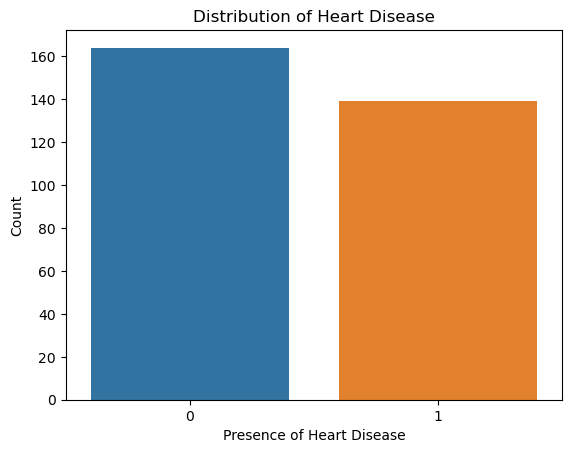

In [12]:
# Distribution of heart disease present or not
sns.countplot(data=df, x='target')
plt.title('Distribution of Heart Disease')
plt.xlabel('Presence of Heart Disease')
plt.ylabel('Count')
plt.show()

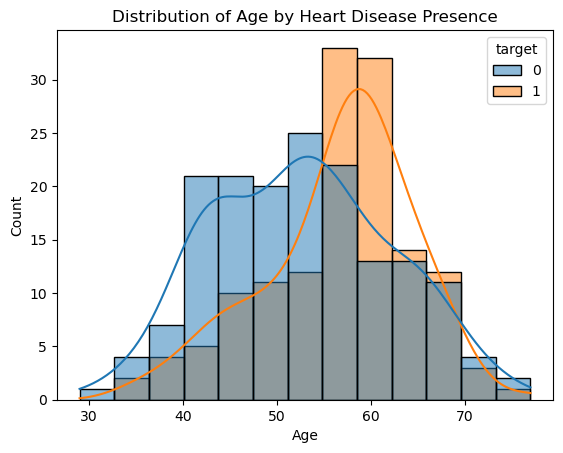

In [13]:
# Distribution of age by heart disease presence
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Distribution of Age by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

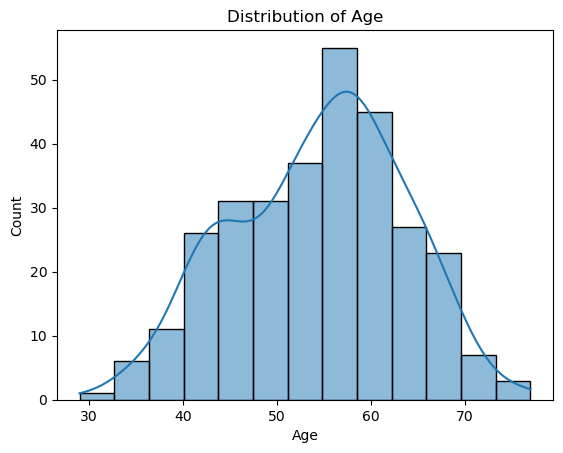

In [14]:
# Distribution of age in the dataset
sns.histplot(data=df, x='age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

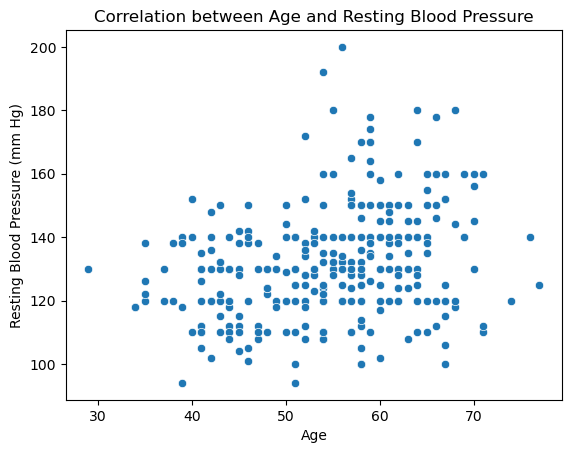

In [15]:
# Correlation between age and resting blood pressure
sns.scatterplot(data=df, x='age', y='trestbps')
plt.title('Correlation between Age and Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()